In [1]:
import face_alignment
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
os.environ['CUDA_VISIBLE_DEVICES']='3'

In [3]:
padding_ratio = 1
input_ratio = 0.1

In [4]:
def pad(img,padding_ratio):
    '''
    :param img: an image, BGR or RGB
    :param padding_ratio: padding width/original width
    :return: padded img
    '''
    h,w,_ = img.shape
    h,w = (int(h*padding_ratio),int(w*padding_ratio))
    return cv2.copyMakeBorder(img,h,h,w,w,cv2.BORDER_CONSTANT)

In [5]:
img = '2P4A1406.JPG'
img = cv2.imread(img)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_padded = pad(img,padding_ratio)
img_padded_RGB = cv2.cvtColor(img_padded, cv2.COLOR_BGR2RGB)

In [6]:
padded_h,padded_w,_ = img_padded_RGB.shape
input_h,input_w = int(padded_h*input_ratio),int(padded_w*input_ratio)
input_RGB = cv2.resize(img_padded_RGB,(input_w,input_h)) # resized padded RGB img

In [7]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False)

In [8]:
pred = fa.get_landmarks(input_RGB)[0]
added_h,added_w = int(img.shape[0]*padding_ratio),int(img.shape[1]*padding_ratio)
pred_ori = pred/input_ratio
pred_ori[:,0] = pred_ori[:,0] - added_w
pred_ori[:,1] = pred_ori[:,1] - added_h

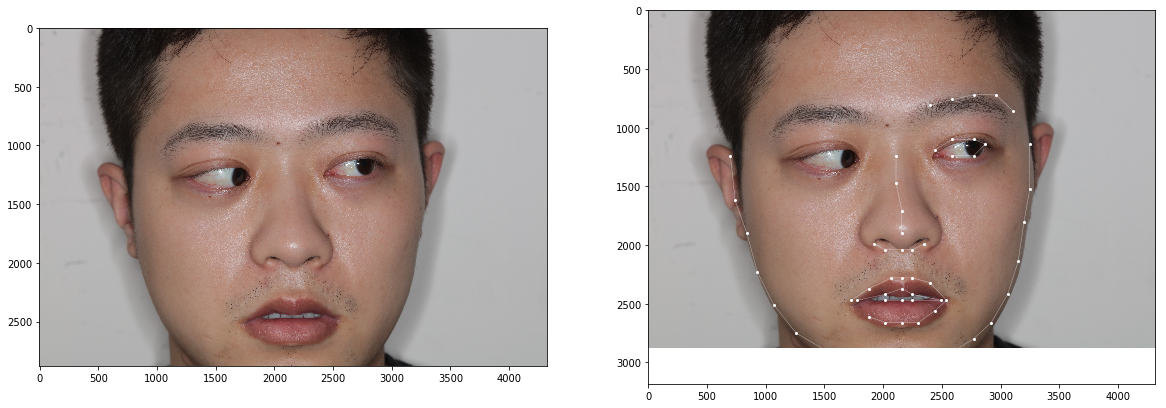

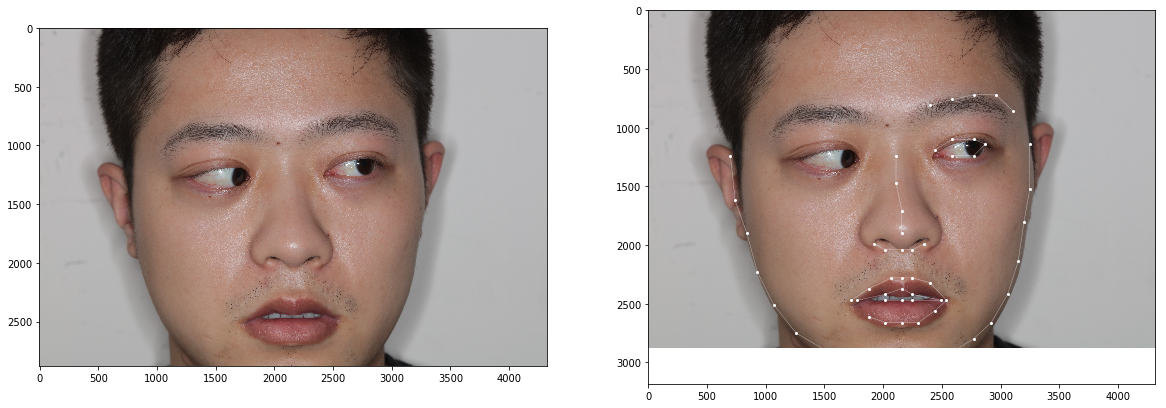

In [13]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(img_RGB)

ax2.plot(pred_ori[0:17,0],pred_ori[0:17,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #下巴
ax2.plot(pred_ori[17:22,0],pred_ori[17:22,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眉毛
ax2.plot(pred_ori[22:27,0],pred_ori[22:27,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眉毛
ax2.plot(pred_ori[27:31,0],pred_ori[27:31,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻梁
ax2.plot(pred_ori[31:36,0],pred_ori[31:36,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻翼
ax2.plot(pred_ori[36:42,0],pred_ori[36:42,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眼
ax2.plot(pred_ori[42:48,0],pred_ori[42:48,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眼
ax2.plot(pred_ori[48:60,0],pred_ori[48:60,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇外轮廓
ax2.plot(pred_ori[60:68,0],pred_ori[60:68,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇内轮廓
fig
#左右指观看人的左右
#17:22 左眉毛从左到右
#22:27 右眉毛从左到右
#36:42 左眼，从左眼角开始顺时针
#42:48 右眼，从左眼角开始顺时针

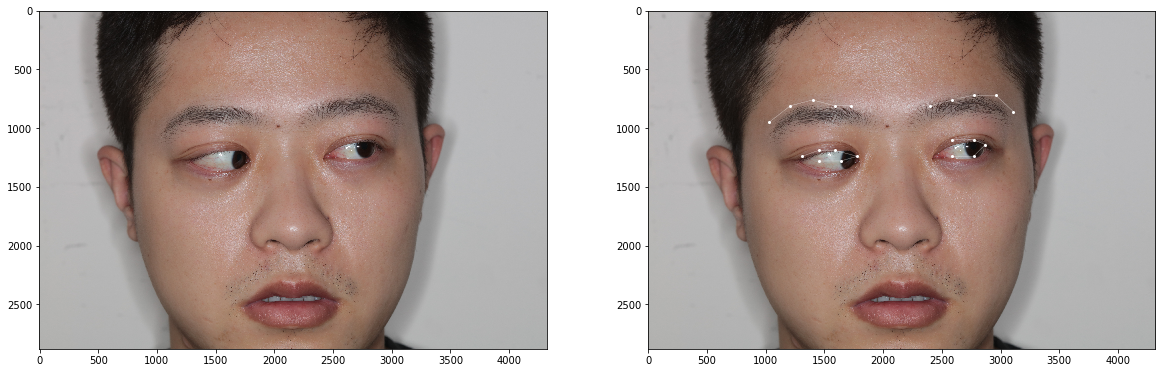

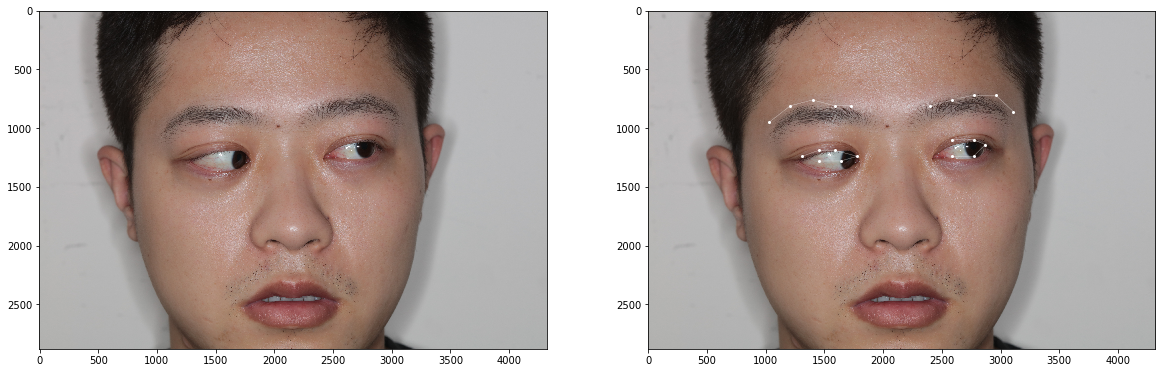

In [22]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.imshow(img_RGB)
ax2.imshow(img_RGB)

# ax2.plot(pred_ori[0:17,0],pred_ori[0:17,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #下巴
ax2.plot(pred_ori[17:22,0],pred_ori[17:22,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眉毛
ax2.plot(pred_ori[22:27,0],pred_ori[22:27,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眉毛
# ax2.plot(pred_ori[27:31,0],pred_ori[27:31,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻梁
# ax2.plot(pred_ori[31:36,0],pred_ori[31:36,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #鼻翼
ax2.plot(pred_ori[36:42,0],pred_ori[36:42,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #左眼
ax2.plot(pred_ori[42:48,0],pred_ori[42:48,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #右眼
# ax2.plot(pred_ori[48:60,0],pred_ori[48:60,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇外轮廓
# ax2.plot(pred_ori[60:68,0],pred_ori[60:68,1],marker='o',markersize=2,linestyle='-',color='w',lw=.25) #嘴唇内轮廓
fig

In [ ]:
#17:22 左眉毛从左到右
#22:27 右眉毛从左到右
#36:42 左眼，从左眼角开始顺时针
#42:48 右眼，从左眼角开始顺时针